 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [10]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [11]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

In [12]:
# Reading whale returns

whale_path = Path("/Users/tarang/Downloads/whale_returns.csv")
whale_df = pd.read_csv(whale_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [13]:
# Count nulls

whale_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [14]:
# Drop nulls
whale_df.dropna(inplace=True)


In [15]:
#Check null values are dropped
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [16]:
# Reading algorithmic returns
algo_path = Path("/Users/tarang/Downloads/algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [17]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [18]:
# Drop nulls
algo_df.dropna(inplace=True)



In [19]:
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [20]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_path = Path("/Users/tarang/Downloads/sp_tsx_history.csv")
sp_tsx_df = pd.read_csv(sp_tsx_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_tsx_df

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [21]:
# Check Data Types
sp_tsx_df.dtypes


Close    object
dtype: object

In [22]:
# Fix Data Types
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace(',', '')
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace('$', '')
sp_tsx_df['Close'] = sp_tsx_df['Close'].astype(float)
sp_tsx_df


/var/folders/_v/_vpqypps0rb4r9h56sk7glcm0000gn/T/ipykernel_17020/1018230847.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace('$', '')


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [23]:
# Calculate Daily Returns
daily_returns = sp_tsx_df.pct_change()
daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [24]:
# Drop nulls
daily_returns.dropna(inplace=True)


In [25]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns.columns = (['SP500 & TSX'])
daily_returns.head()

,SP500 & TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [26]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, daily_returns], axis = "columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 & TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

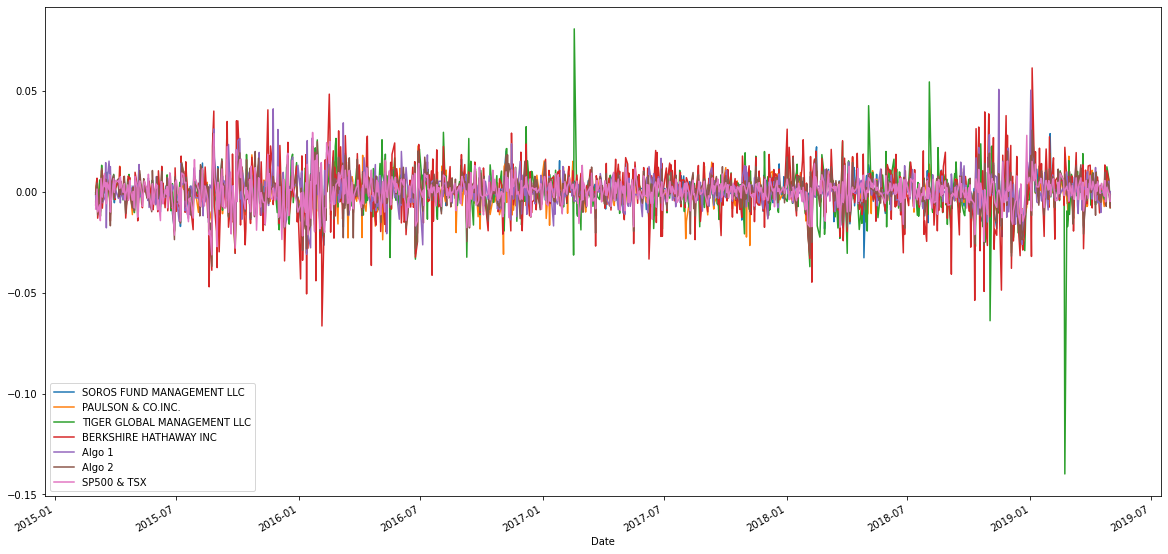

In [27]:
# Plot daily returns of all portfolios
combined_df.plot(figsize = (20, 10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

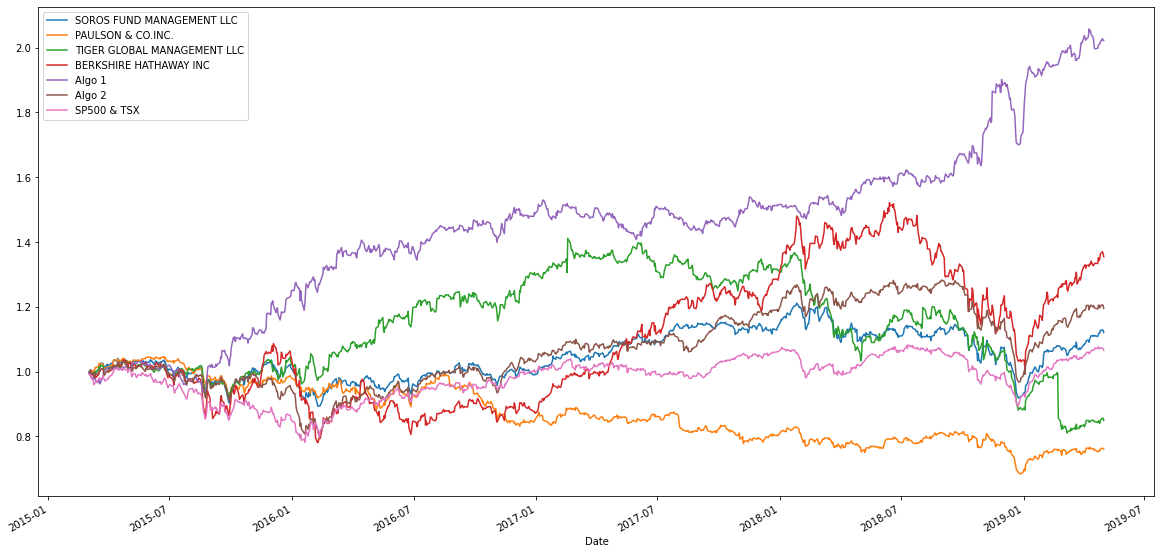

In [28]:
# Calculate cumulative returns of all portfolios

cum_df = (1 + combined_df).cumprod()
cum_df.plot(figsize = (20,10))

# Plot cumulative returns


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

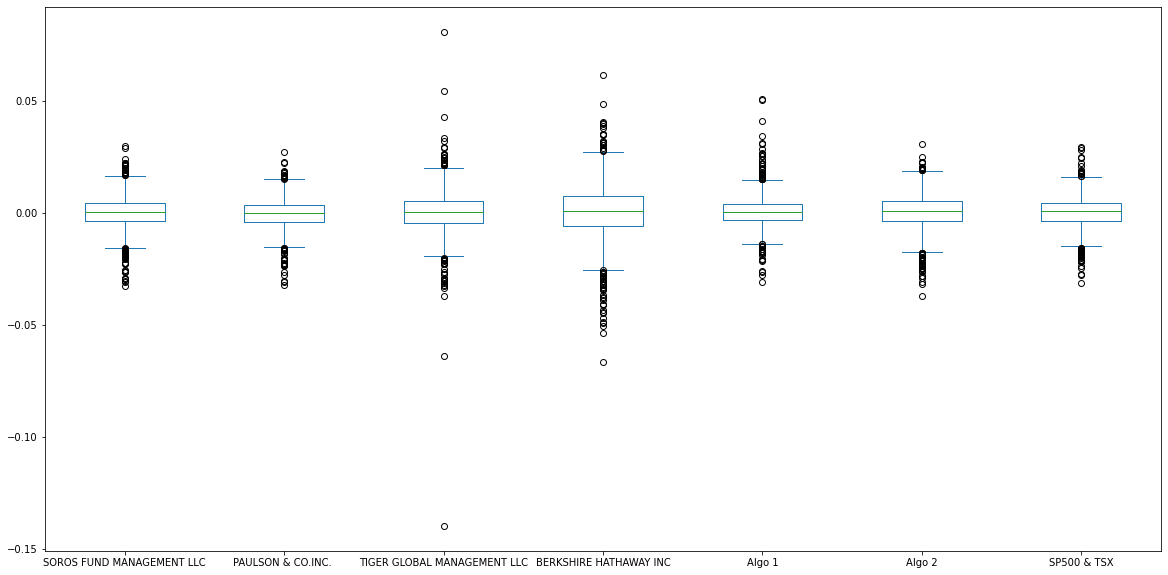

In [29]:
# Box plot to visually show risk
combined_df.plot(kind = "box", figsize = (20,10))


### Calculate Standard Deviations

In [30]:
# Calculate the daily standard deviations of all portfolios

combined_std = combined_df.std()

combined_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
SP500 & TSX                    0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [31]:
# Calculate  the daily standard deviation of S&P TSX 60
riskier = (combined_std > combined_std['SP500 & TSX'])
riskier




#Determine which portfolios are riskier than the S&P TSX 60
    #SOROS FUND MANAGEMENT LLC       
    #TIGER GLOBAL MANAGEMENT LLC     
    #BERKSHIRE HATHAWAY INC         
    #Algo 1                          
    #Algo 2    

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
SP500 & TSX                    False
dtype: bool

### Calculate the Annualized Standard Deviation

In [32]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
SP500 & TSX                    0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

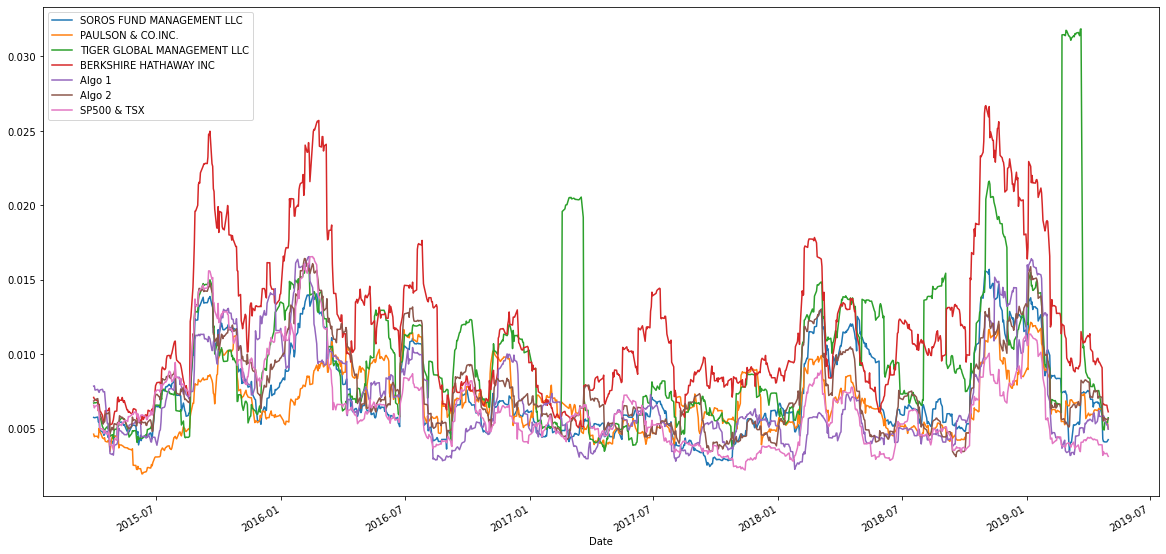

In [33]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

rolling_std = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot(figsize = (20,10))

### Calculate and plot the correlation

<AxesSubplot:>

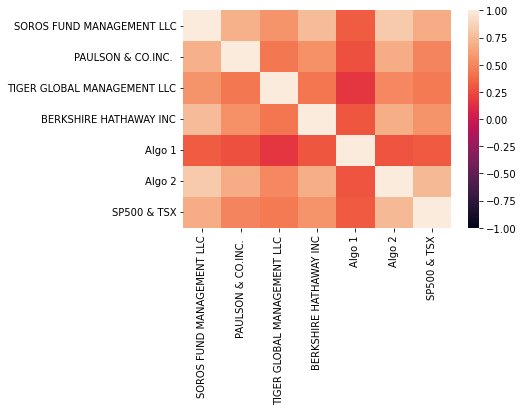

In [34]:
# Calculate the correlation
correlation = combined_df.corr()


# Display de correlation matrix
sns.heatmap(correlation, vmin= -1, vmax= 1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

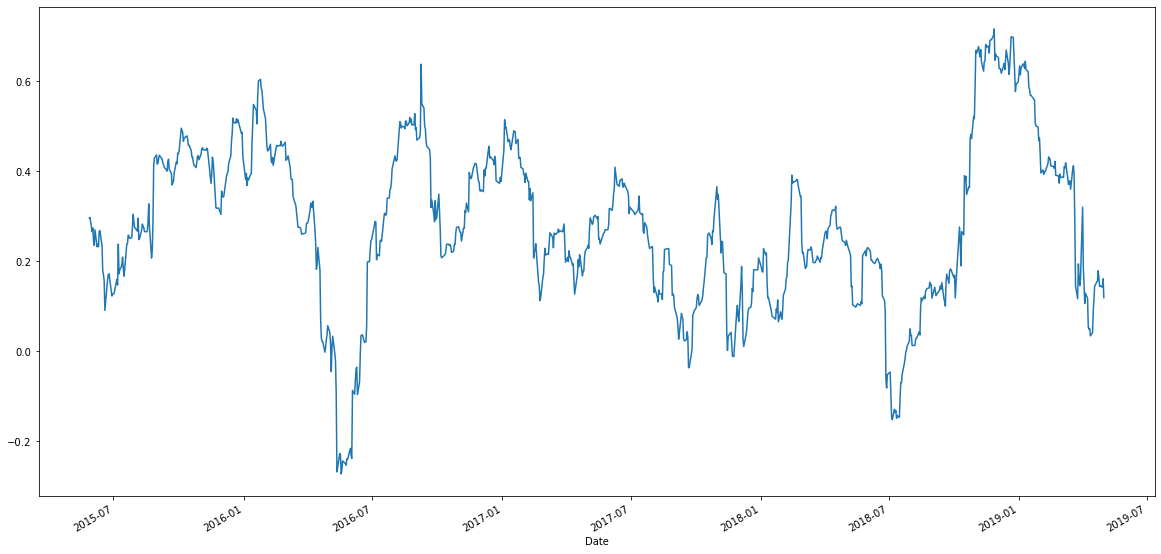

In [35]:
# Calculate covariance of a single portfolio
cov = combined_df['Algo 1'].rolling(window=60).cov(combined_df['SP500 & TSX']) 
# Calculate variance of S&P TSX
var = combined_df['SP500 & TSX'].rolling(window=60).var()
# Computing beta
beta = cov / var
# Plot beta trend
beta.plot(figsize = (20, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

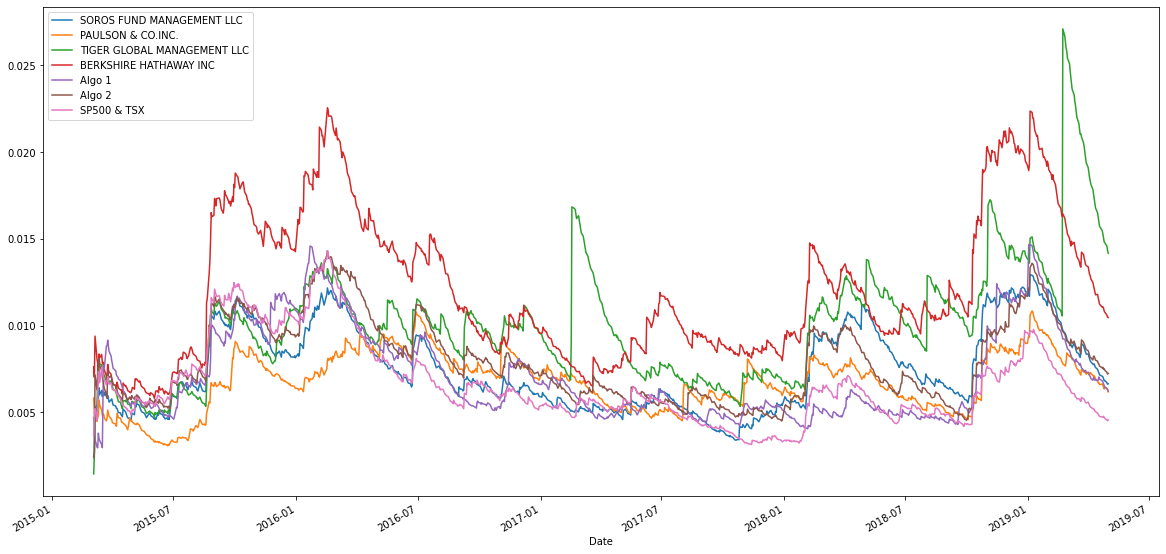

In [36]:
# Use `ewm` to calculate the rolling window

rolling_ewm = combined_df.ewm(halflife = 21).std().plot(figsize = (20, 10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [37]:
# Annualized Sharpe Ratios
sharpe_ratio = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
SP500 & TSX                    0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

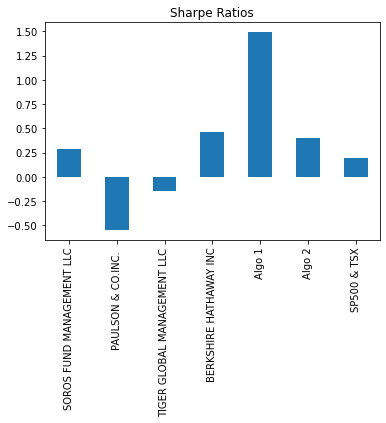

In [38]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar', title= 'Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [39]:
# Reading data from 1st stock
apple_path = Path("/Users/tarang/Downloads/AAPL.csv")
apple_df = pd.read_csv(apple_path,index_col='Date', parse_dates=True)
apple_df


,Close
Date,
2015-03-03,32.340000
2015-03-04,32.134998
2015-03-05,31.602501
2015-03-06,31.650000
2015-03-09,31.785000
...,...
2016-02-24,24.025000
2016-02-25,24.190001
2016-02-26,24.227501


In [40]:
# Reading data from 2nd stock
tesla_path = Path("/Users/tarang/Downloads/TSLA.csv")
tesla_df = pd.read_csv(tesla_path,index_col='Date', parse_dates=True)
tesla_df

,Close
Date,
2015-03-03,39.911999
2015-03-04,40.487999
2015-03-05,40.125999
2015-03-06,38.776001
2015-03-09,38.175999
...,...
2016-02-24,35.799999
2016-02-25,37.486000
2016-02-26,38.068001


In [41]:
# Reading data from 3rd stock
rio_path = Path("/Users/tarang/Downloads/REI.csv")
rio_df = pd.read_csv(rio_path,index_col='Date', parse_dates=True)
rio_df

,Close
Date,
2015-03-03,29.040001
2015-03-04,28.760000
2015-03-05,28.370001
2015-03-06,27.629999
2015-03-09,27.740000
...,...
2016-02-24,26.190001
2016-02-25,25.900000
2016-02-26,25.680000


In [42]:
# Combine all stocks in a single DataFrame
my_combined_df = pd.concat([apple_df, tesla_df, rio_df], axis = 'columns', join='inner')
my_combined_df.head()

,Close,Close,Close
Date,,,
2015-03-03,32.340000,39.911999,29.040001
2015-03-04,32.134998,40.487999,28.760000
2015-03-05,31.602501,40.125999,28.370001
2015-03-06,31.650000,38.776001,27.629999
2015-03-09,31.785000,38.175999,27.740000


In [43]:
# Reorganize portfolio data by having a column per symbol
my_combined_df.columns = ['Apple', 'Tesla', 'Rio']
my_combined_df.head()

,Apple,Tesla,Rio
Date,,,
2015-03-03,32.340000,39.911999,29.040001
2015-03-04,32.134998,40.487999,28.760000
2015-03-05,31.602501,40.125999,28.370001
2015-03-06,31.650000,38.776001,27.629999
2015-03-09,31.785000,38.175999,27.740000


In [44]:
# Calculate daily returns
my_daily_returns = my_combined_df.pct_change()


# Drop NAs
my_daily_returns.dropna()
# Display sample data
my_daily_returns.head()

,Apple,Tesla,Rio
Date,,,
2015-03-03,NaN,NaN,NaN
2015-03-04,-0.006339,0.014432,-0.009642
2015-03-05,-0.016571,-0.008941,-0.013560
2015-03-06,0.001503,-0.033644,-0.026084
2015-03-09,0.004265,-0.015474,0.003981


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [45]:
# Set weights
weights = [1/3, 1/3, 1/3]
my_weighted_returns = my_daily_returns.dot(weights)


# Display sample data
my_weighted_returns

Date
2015-03-03         NaN
2015-03-04   -0.000516
2015-03-05   -0.013024
2015-03-06   -0.019408
2015-03-09   -0.002409
                ...   
2016-02-24    0.014950
2016-02-25    0.014297
2016-02-26    0.002861
2016-02-29    0.001509
2016-03-01    0.004587
Length: 247, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [46]:
# Join your returns DataFrame to the original returns DataFrame
both_df = pd.concat([combined_df, my_weighted_returns], axis='columns', join='inner')
both_df.rename(columns = {0:"my_portfolio"}, inplace = True)
both_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 & TSX,my_portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,-0.000516
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,-0.013024
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.019408
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,-0.002409
...,...,...,...,...,...,...,...,...
2016-02-24,0.006226,0.000833,0.002489,0.012132,0.005191,0.006252,-0.001815,0.014950
2016-02-25,0.008691,0.014958,0.022396,-0.011997,-0.005957,0.006605,0.001046,0.014297
2016-02-26,0.003480,0.002174,0.026421,0.008685,0.005786,0.005180,0.003465,0.002861


In [47]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
both_df.dropna(inplace=True)


#Check if any NaN value remaining

both_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500 & TSX                    0
my_portfolio                   0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [48]:
# Calculate the annualized `std`

both_std = both_df.std()
both_std

SOROS FUND MANAGEMENT LLC      0.008990
PAULSON & CO.INC.              0.006521
TIGER GLOBAL MANAGEMENT LLC    0.009671
BERKSHIRE HATHAWAY INC         0.015190
Algo 1                         0.009723
Algo 2                         0.010058
SP500 & TSX                    0.010113
my_portfolio                   0.013853
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

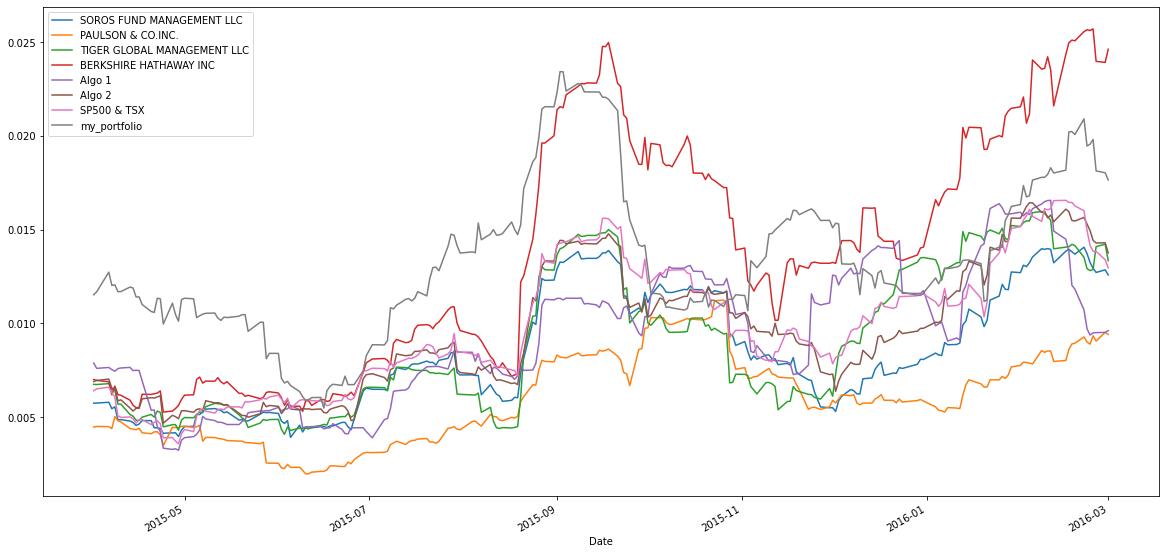

In [54]:
# Calculate rolling standard deviation

both_rolling = both_df.rolling(window=21).std()

# Plot rolling standard deviation
both_rolling.plot(figsize= (20, 10))

### Calculate and plot the correlation

<AxesSubplot:>

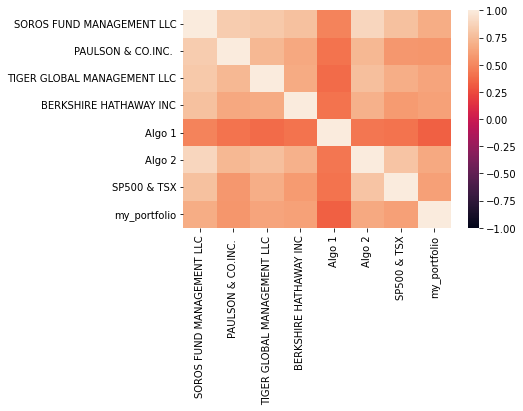

In [57]:
# Calculate and plot the correlation
correlation = both_df.corr()
sns.heatmap(correlation, vmin=-1, vmax = 1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

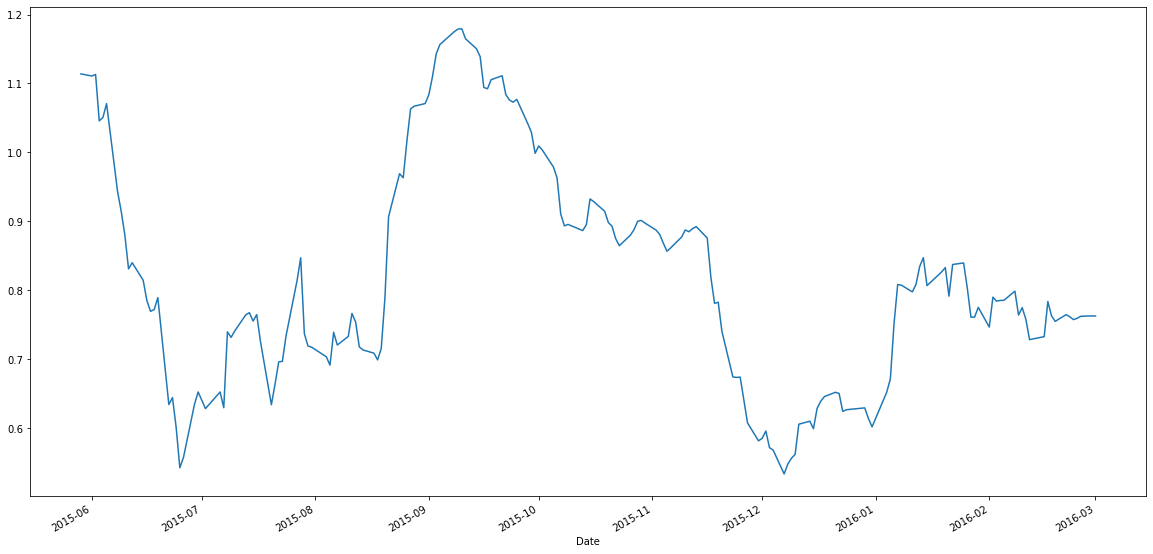

In [66]:
# Calculate and plot Beta

rolling_cov = both_df['my_portfolio'].rolling(window=60).cov(both_df['SP500 & TSX'])
rolling_var = both_df['SP500 & TSX'].rolling(window=60).var()
rolling_beta = rolling_cov / rolling_var
rolling_beta.plot(figsize = (20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [68]:
# Calculate Annualized Sharpe Ratios
both_sharpe_ratios = (both_df.mean() * 252) / (both_df.std() * np.sqrt(252))
both_sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.194323
PAULSON & CO.INC.             -0.331253
TIGER GLOBAL MANAGEMENT LLC    0.456562
BERKSHIRE HATHAWAY INC        -0.439982
Algo 1                         1.925558
Algo 2                        -0.778847
SP500 & TSX                   -0.852650
my_portfolio                  -0.462678
dtype: float64

<AxesSubplot:>

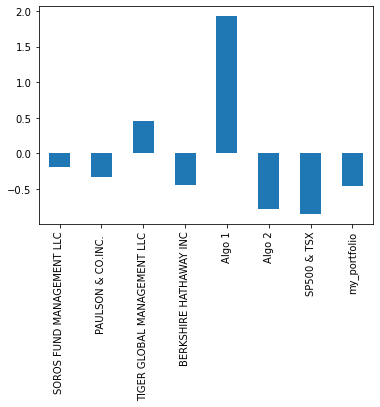

In [69]:
# Visualize the sharpe ratios as a bar plot
both_sharpe_ratios.plot(kind='bar')

### How does your portfolio do?

Write your answer here!
My Portfolio is correlated to Paulson & Co Inc. My portfolio for 2015-2016 was not doing so good since the sharpe ratio was below 1.


